# Data Manipulation Assignment: Combining and Analyzing Retail Data

This assignment is designed to test your ability to work with multiple datasets using Pandas. You will be provided with separate files for customer information and sales transactions. Your task is to clean, combine, and analyze these datasets to gain a complete view of our business performance.

## The Datasets

You will work with the following files:

- `customers.csv`: Contains customer-level information (`CustomerID`, `CustomerName`, `CustomerAge`, `Gender`, `City`).
- `online_sales.csv`: Contains online sales transactions (`TransactionID`, `CustomerID`, `ProductCategory`, `TransactionAmount`, `SalesChannel`, `PurchaseDate`).
- `in_store_sales.csv`: Contains in-store sales transactions (`TransactionID`, `CustomerID`, `ProductCategory`, `TransactionAmount`, `SalesChannel`, `PurchaseDate`).

---

## Part 1: Data Loading and Initial Inspection

**Objective:** Load the three datasets and perform a preliminary inspection of their structure.

1.  Load `customers.csv`, `online_sales.csv`, and `in_store_sales.csv` into separate Pandas DataFrames.
2.  Display the first 5 rows and a summary (`.info()`) for each DataFrame to understand its structure.

---

In [6]:
# 1
import pandas as pd
customers_df = pd.read_csv('customers.csv')
online_sales_df = pd.read_csv('online_sales.csv')
in_store_sales_df = pd.read_csv('in_store_sales.csv')

In [7]:
# 2
for df_name, df in zip(['customers_df', 'online_sales_df', 'in_store_sales_df'],
                       [customers_df, online_sales_df, in_store_sales_df]):

    print(f"first 5 rows of {df_name}:")
    print(df.head())
    print(f"\nsummary of {df_name}:")
    print(df.info())
    print("\n" + "="*50 + "\n")

first 5 rows of customers_df:
   CustomerID    CustomerName  CustomerAge  Gender       City
0        1001      Isha Hegde           54    Male      Delhi
1        1002   Kavita DSouza           21    Male    Kolkata
2        1003      Diya Gupta           19  Female    Kolkata
3        1004  Vivaan Iyengar           45    Male  Hyderabad
4        1005  Ananya Iyengar           18  Female    Chennai

summary of customers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    5000 non-null   int64 
 1   CustomerName  5000 non-null   object
 2   CustomerAge   5000 non-null   int64 
 3   Gender        5000 non-null   object
 4   City          5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB
None


first 5 rows of online_sales_df:
   TransactionID  CustomerID ProductCategory  TransactionAmount SalesChannel  \


## Part 2: Data Concatenation (`pd.concat`)

**Objective:** Combine the sales data from different channels into a single, unified DataFrame.

3.  Concatenate the `online_sales` and `in_store_sales` DataFrames to create a new DataFrame called `all_sales_df`.
4.  Check the shape and the first 5 rows of `all_sales_df` to ensure the concatenation was successful.
5.  Check for and handle any duplicate entries in the `all_sales_df`.
6.  Display the counts of each `SalesChannel` to confirm all data was included.

---

In [8]:
# 3
all_sales_df = pd.concat([online_sales_df, in_store_sales_df], ignore_index=True)

In [9]:
# 4
print("Shape of all_sales_df:", all_sales_df.shape)
print("First 5 rows of all_sales_df:")
print(all_sales_df.head())

Shape of all_sales_df: (5000, 6)
First 5 rows of all_sales_df:
   TransactionID  CustomerID ProductCategory  TransactionAmount SalesChannel  \
0          10001        1603           Books        2708.445962       Online   
1          10002        4548         Apparel        2822.318124       Online   
2          10003        1784       Groceries        1935.709806       Online   
3          10004        5144     Electronics        1631.719666       Online   
4          10005        5458           Books        1482.805834       Online   

  PurchaseDate  
0   2023-12-31  
1   2023-09-18  
2   2023-02-25  
3   2023-07-12  
4   2023-01-13  


In [10]:
# 5
duplicate_count = all_sales_df.duplicated().sum()
print("Number of duplicate rows in all_sales_df:", duplicate_count)
all_sales_df = all_sales_df.drop_duplicates()
print("Shape after removing duplicates:", all_sales_df.shape)

Number of duplicate rows in all_sales_df: 0
Shape after removing duplicates: (5000, 6)


In [11]:
# 6
print("SalesChannel counts:")
print(all_sales_df['SalesChannel'].value_counts())


SalesChannel counts:
SalesChannel
Online      2500
In-Store    2500
Name: count, dtype: int64


## Part 3: Data Merging (`pd.merge`) and Analysis

**Objective:** Join the combined sales data with the customer data to enable a rich, cross-dataset analysis.

7.  Merge the `all_sales_df` with the `customers` DataFrame on the common column `CustomerID`. Store the result in a new DataFrame called `combined_data`.
8.  Check the shape and `info()` of `combined_data` to ensure the join was successful.
9.  Find the top 5 cities with the highest total sales.
10. Calculate the average transaction amount for each `ProductCategory`.
11. Determine the number of unique customers who made a purchase in each `SalesChannel`.

---

In [12]:
# 7
import pandas as pd
all_sales_df = pd.read_csv("online_sales.csv")
customers_df = pd.read_csv("customers.csv")
combined_data = pd.merge(all_sales_df, customers_df, on='CustomerID', how='inner')

In [13]:
# 8
print("Shape of combined_data:", combined_data.shape)
print(combined_data.info())

Shape of combined_data: (2500, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      2500 non-null   int64  
 1   CustomerID         2500 non-null   int64  
 2   ProductCategory    2500 non-null   object 
 3   TransactionAmount  2500 non-null   float64
 4   SalesChannel       2500 non-null   object 
 5   PurchaseDate       2500 non-null   object 
 6   CustomerName       2500 non-null   object 
 7   CustomerAge        2500 non-null   int64  
 8   Gender             2500 non-null   object 
 9   City               2500 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 195.4+ KB
None


In [14]:
# 9
top_5_cities = (combined_data.groupby('City')['TransactionAmount'].sum().sort_values(ascending=False).head(5))
print(top_5_cities)

City
Hyderabad    986920.066516
Chennai      976472.781653
Bangalore    942639.422734
Pune         878664.610635
Delhi        862633.849186
Name: TransactionAmount, dtype: float64


In [15]:
# 10
avg_transaction_by_category = combined_data.groupby('ProductCategory')['TransactionAmount'].mean()
print(avg_transaction_by_category)

ProductCategory
Apparel        2547.458989
Books          2472.874603
Electronics    2527.282739
Groceries      2435.556413
Home Goods     2545.218883
Name: TransactionAmount, dtype: float64


In [16]:
# 11
unique_customers_by_channel = combined_data.groupby('SalesChannel')['CustomerID'].nunique()
print(unique_customers_by_channel)

SalesChannel
Online    1968
Name: CustomerID, dtype: int64


## Part 4: Data Visualization

**Objective:** Create informative plots to visually represent key insights from the combined data.

12. Create a bar plot showing the total `TransactionAmount` for each `City`.
13. Visualize the total sales amount by `ProductCategory` using a bar plot.
14. Create a histogram of the `CustomerAge` distribution for customers who made a purchase.
15. Use a box plot to show the distribution of `TransactionAmount` across different `ProductCategory`s.
16. Create a bar plot to show the average `TransactionAmount` by `Gender`.

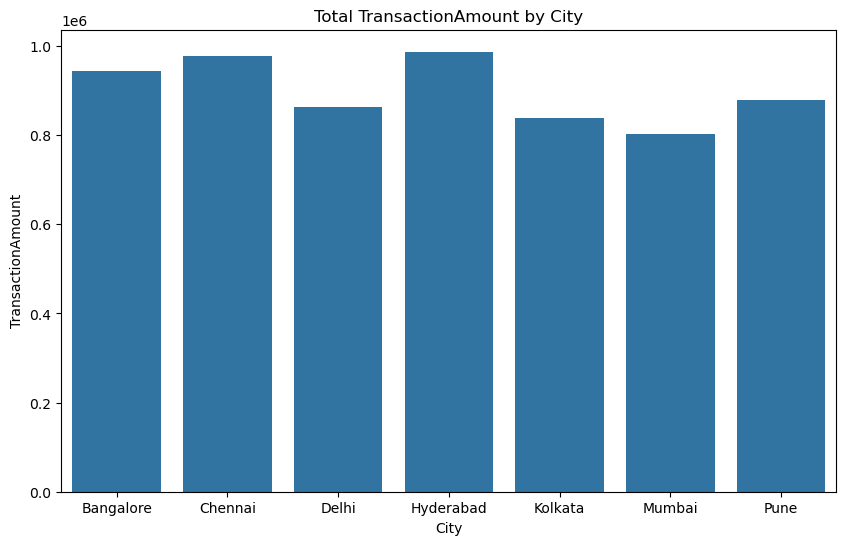

In [21]:
# 12
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

city_sales = combined_data.groupby('City')['TransactionAmount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='TransactionAmount', data=city_sales)
plt.title('Total TransactionAmount by City')
#plt.tight_layout()
plt.show()

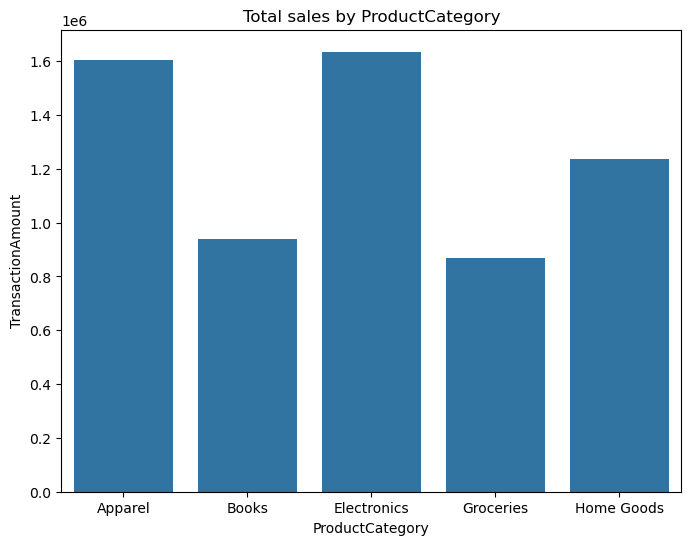

In [22]:
# 13
category_sales = combined_data.groupby('ProductCategory')['TransactionAmount'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='ProductCategory', y='TransactionAmount', data=category_sales )
plt.title('Total sales by ProductCategory')
plt.show()

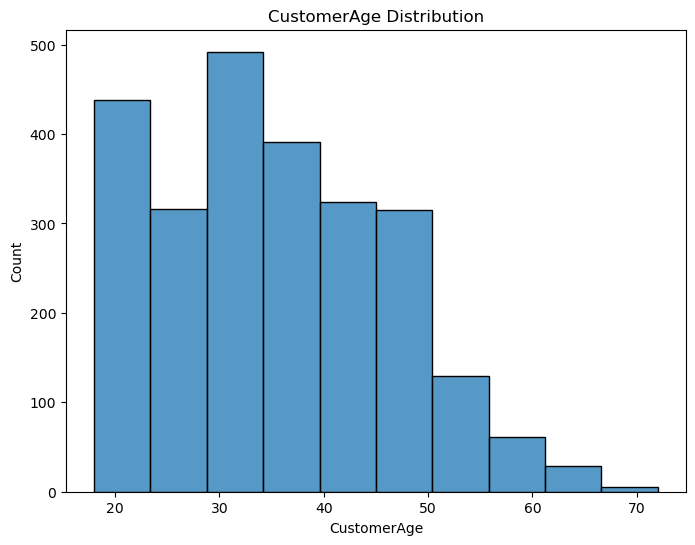

In [24]:
# 14
plt.figure(figsize=(8,6))
sns.histplot(combined_data['CustomerAge'], bins=10)
plt.title('CustomerAge Distribution')
plt.show()

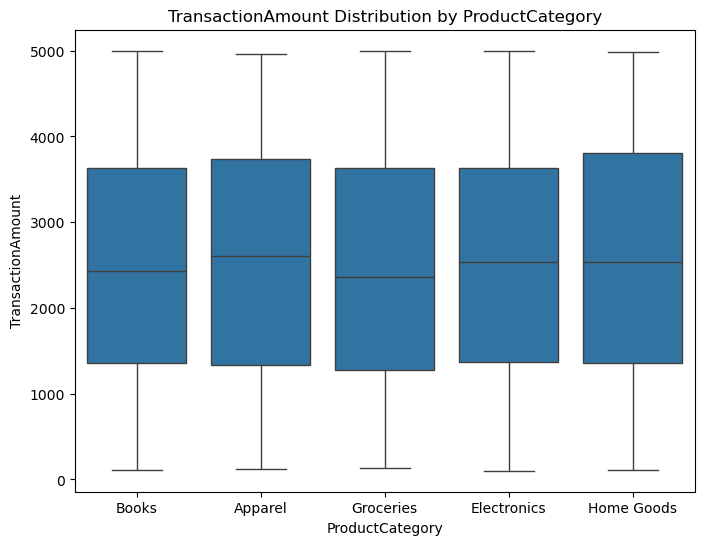

In [26]:
# 15
plt.figure(figsize=(8,6))
sns.boxplot(x='ProductCategory', y='TransactionAmount', data=combined_data)
plt.title('TransactionAmount Distribution by ProductCategory')
plt.show()

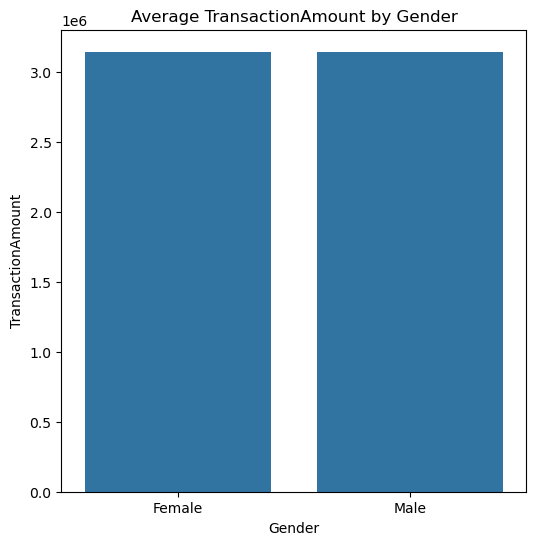

In [28]:
#16

gender_avg = combined_data.groupby('Gender')['TransactionAmount'].sum().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x='Gender', y='TransactionAmount', data=gender_avg )
plt.title('Average TransactionAmount by Gender')
plt.show()